In [1]:
%%html
<style>
body {
    font-family: "Arial Black", cursive, sans-serif;
}
</style> 

# Machine Learning Project 

Akanksha Chauhan



    Classification Dataset: AirBnb Price Evaluation
    Regression Dataset: Rain in Australia

# Dataset -1 Classification

# Introduction
    Airbnb is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences since 2008. NYC is the most populous city in the United States and also one of the most popular tourism and business place in the world.

    Airbnb NYC 2019 data contains listing activity and metrics. 
    The dataset has been taken from https://www.kaggle.com/duygut/airbnb-nyc-price-prediction/notebook.

# AIM
    To explore the features for a proper analytical analytical analysis into the ones that explain how they affect pricing of a property on airbnb.



# Data Exploration

In [2]:
#supress all the warning to make code more readable
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Akanksha Chauhan/Desktop/Machine Learning/Project 1/AB_NYC_2019.csv')
df.info()

#checking the sum of missing values across dataset
data_missing = df.isnull()
data_missing.head()
missing = df.isnull()
missing.sum()
df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 15 columns):
id                                10001 non-null int64
name                              9996 non-null object
host_id                           10001 non-null int64
host_name                         9999 non-null object
neighbourhood_group               10001 non-null object
latitude                          10001 non-null float64
longitude                         10001 non-null float64
room_type                         10001 non-null object
price                             10001 non-null int64
minimum_nights                    10001 non-null int64
number_of_reviews                 10001 non-null int64
last_review                       7960 non-null object
reviews_per_month                 7960 non-null float64
calculated_host_listings_count    10001 non-null int64
availability_365                  10001 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 1.1+ 

10001

In [3]:
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Data Preprocessing

In [4]:
y=df['price'].values #Eliminating Non-nominal data and old price feature
new_df = df.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price']) #dropping the columns not useful in data modeling
new_df.isnull().sum()

neighbourhood_group                  0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2041
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [5]:
mean = new_df['reviews_per_month'].mean() #replacing missing reviews with the mean value
new_df['reviews_per_month'].fillna(mean, inplace=True)

new_df.isnull().sum()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 9 columns):
neighbourhood_group               10001 non-null object
latitude                          10001 non-null float64
longitude                         10001 non-null float64
room_type                         10001 non-null object
minimum_nights                    10001 non-null int64
number_of_reviews                 10001 non-null int64
reviews_per_month                 10001 non-null float64
calculated_host_listings_count    10001 non-null int64
availability_365                  10001 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 703.3+ KB


# Selecting dummy variables for neighbourhood_group and room_type for modeling 

In [6]:
new_df1 =pd.get_dummies(new_df,columns=['neighbourhood_group', 'room_type'], prefix=['neighbourhood_group', 'room_type'])

In [7]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 15 columns):
latitude                             10001 non-null float64
longitude                            10001 non-null float64
minimum_nights                       10001 non-null int64
number_of_reviews                    10001 non-null int64
reviews_per_month                    10001 non-null float64
calculated_host_listings_count       10001 non-null int64
availability_365                     10001 non-null int64
neighbourhood_group_Bronx            10001 non-null uint8
neighbourhood_group_Brooklyn         10001 non-null uint8
neighbourhood_group_Manhattan        10001 non-null uint8
neighbourhood_group_Queens           10001 non-null uint8
neighbourhood_group_Staten Island    10001 non-null uint8
room_type_Entire home/apt            10001 non-null uint8
room_type_Private room               10001 non-null uint8
room_type_Shared room                10001 non-null uint8
dtypes: float64

# Feature Selection using Linear Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(new_df1,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

X_train_org = X_train
X_test_org = X_test

Optimum number of features: 7
Score with 7 features: 0.090564


# FINDING OUT THE OPTIMUM FEATURES

In [9]:
cols = list(new_df1.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 17)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(new_df1,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')


# The best features from the dummy variables have been selected and placed in a new variable

In [10]:
X = new_df1[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 15 columns):
latitude                             10001 non-null float64
longitude                            10001 non-null float64
minimum_nights                       10001 non-null int64
number_of_reviews                    10001 non-null int64
reviews_per_month                    10001 non-null float64
calculated_host_listings_count       10001 non-null int64
availability_365                     10001 non-null int64
neighbourhood_group_Bronx            10001 non-null uint8
neighbourhood_group_Brooklyn         10001 non-null uint8
neighbourhood_group_Manhattan        10001 non-null uint8
neighbourhood_group_Queens           10001 non-null uint8
neighbourhood_group_Staten Island    10001 non-null uint8
room_type_Entire home/apt            10001 non-null uint8
room_type_Private room               10001 non-null uint8
room_type_Shared room                10001 non-null uint8
dtypes: float64

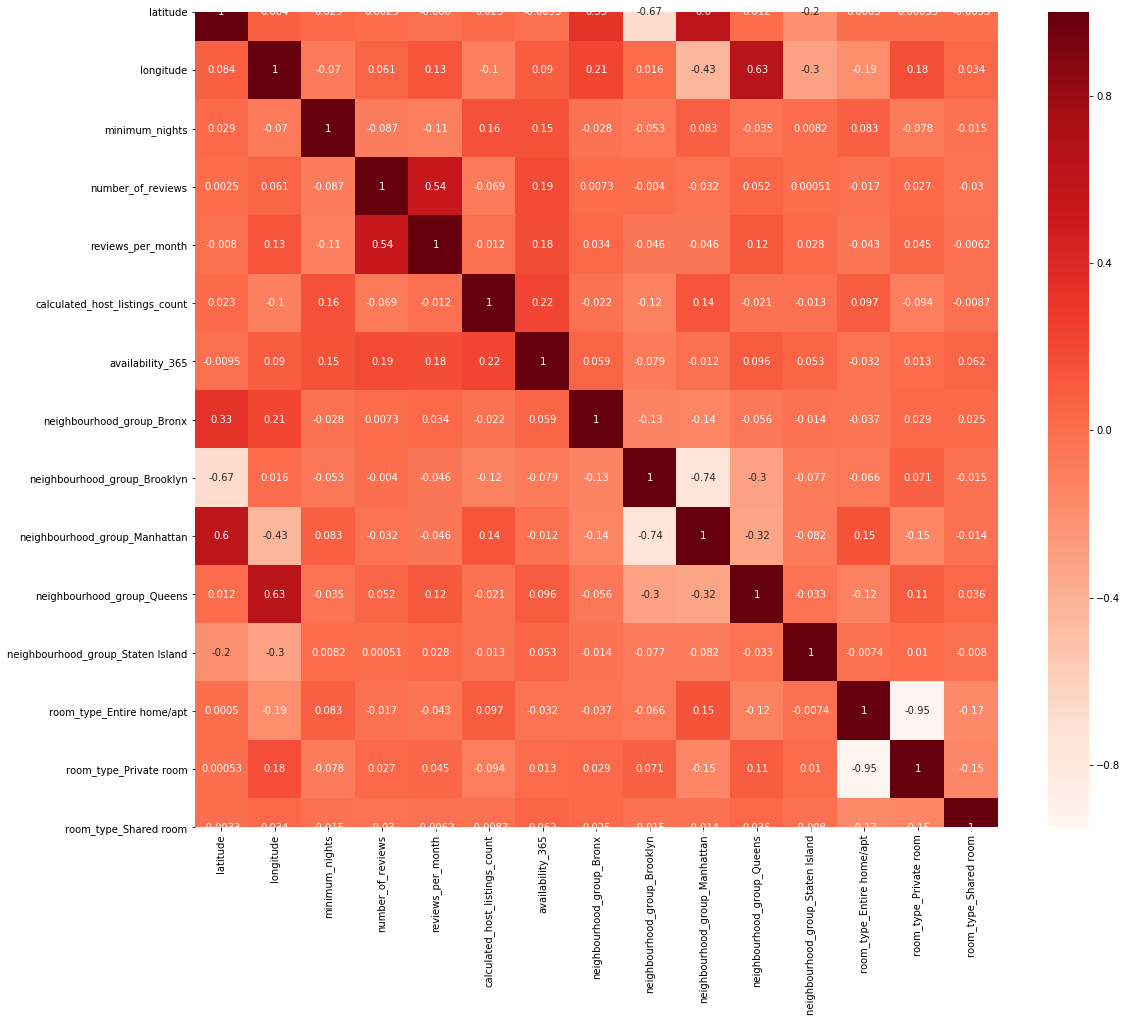

In [11]:
#Using Pearson Correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,15))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
scaler = preprocessing.StandardScaler().fit(X_train)
#Means of All columns
print(scaler.mean_)
#StdDev of all columns
print(scaler.scale_)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

org_scaler = preprocessing.StandardScaler().fit(X_train_org)
X_train_org = org_scaler.transform(X_train_org)
X_test_org = org_scaler.transform(X_test_org)

[ 4.07289566e+01 -7.39516701e+01  6.90085714e+00  2.38044286e+01
  1.38562307e+00  6.51242857e+00  1.12610143e+02  2.27142857e-02
  4.13428571e-01  4.41142857e-01  1.14571429e-01  8.14285714e-03
  5.11857143e-01  4.61857143e-01  2.62857143e-02]
[5.47266105e-02 4.61825848e-02 1.60312160e+01 4.58745545e+01
 1.50556773e+00 2.95994810e+01 1.31583181e+02 1.48991097e-01
 4.92448360e-01 4.96523752e-01 3.18504029e-01 8.98696335e-02
 4.99859388e-01 4.98543000e-01 1.59983673e-01]


In [15]:
sns.set(rc={'figure.figsize':(20,12)}) #for visualization

In [36]:
import warnings
warnings.filterwarnings("ignore")

# Bagging


# <font color='Red'>Bagging using Support Vector Regressor

Text(0, 0.5, 'Scores')

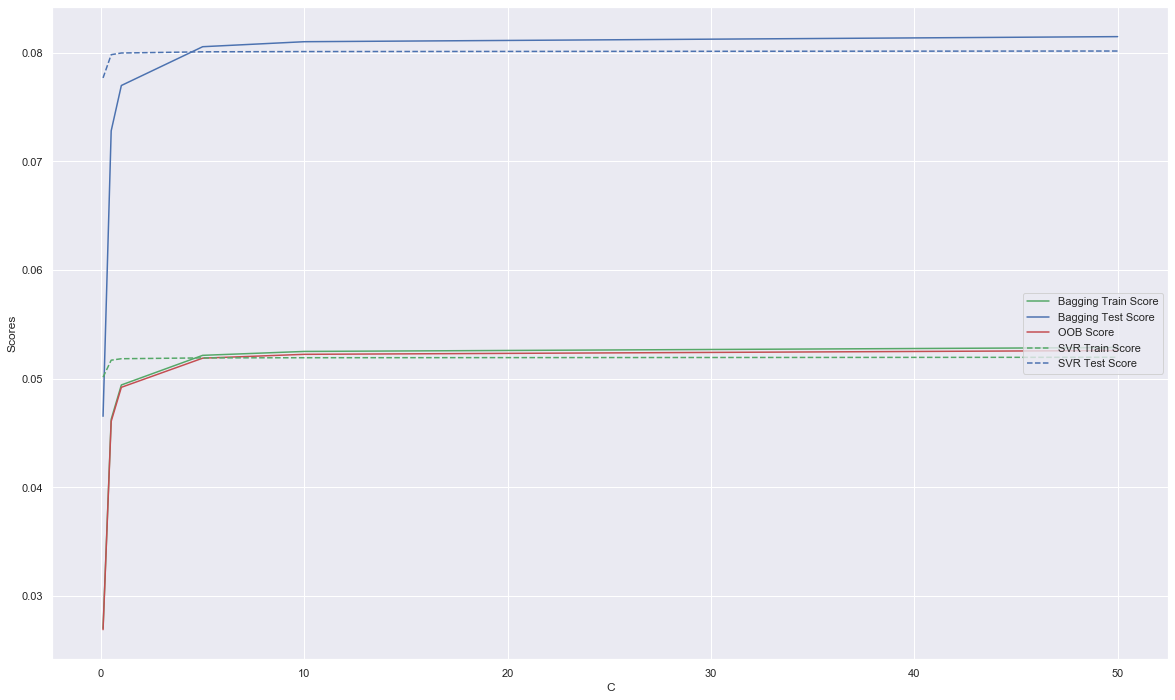

In [20]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score


train_score_array = []
test_score_array = []
org_train_score_array = []
org_test_score_array = []
oob_score_array=[]

for i in [0.1, 0.5, 1, 5, 10, 50]:
    svm_reg = SVR(kernel='linear', C=i)
    svm_reg.fit(X_train, y_train)
    org_train_score_array.append(svm_reg.score(X_train, y_train))
    org_test_score_array.append(svm_reg.score(X_test, y_test))
    bag_reg_svm = BaggingRegressor(svm_reg, n_estimators=100, max_samples=500, bootstrap=True,random_state=0,oob_score=True)
    bag_reg_svm.fit(X_train, y_train)
    train_score_array.append(bag_reg_svm.score(X_train, y_train))
    test_score_array.append(bag_reg_svm.score(X_test, y_test))
    oob_score_array.append(bag_reg_svm.oob_score_)
    
x_axis = [0.1, 0.5, 1, 5, 10, 50]
plt.plot(x_axis, train_score_array, c = 'g', label = 'Bagging Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Bagging Test Score')
plt.plot(x_axis, oob_score_array, c = 'r', label = 'OOB Score')
plt.plot(x_axis, org_train_score_array, c = 'g', label = 'SVR Train Score', linestyle = '--')
plt.plot(x_axis, org_test_score_array, c = 'b', label = 'SVR Test Score', linestyle = '--')
plt.legend(loc=5)
plt.xlabel('C')
plt.ylabel('Scores')

In [21]:
svm_reg = SVR(kernel='linear', C=10)
svm_reg.fit(X_train, y_train)
y_pred=svm_reg.predict(X_test)
bag_reg_svm = BaggingRegressor(svm_reg, n_estimators=500, max_samples=500, bootstrap=True,random_state=0,oob_score=True)
bag_reg_svm.fit(X_train, y_train)
y_pred=bag_reg_svm.predict(X_test)

print('Train score: {:.4f}'.format(bag_reg_svm.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_reg_svm.score(X_test, y_test)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 0.0522
Test score: 0.0806
RMSE: 187.8285


# <font color='Red'>Bagging using KNN Regressor


Text(0, 0.5, 'MSE')

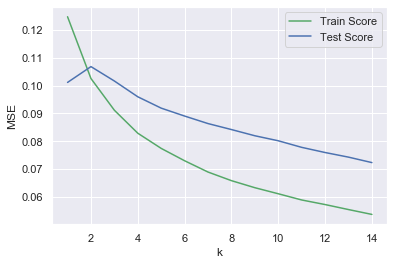

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import RobustScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = None)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,15):
    knn_reg = KNeighborsRegressor(k)
    bag_knn=BaggingRegressor(knn_reg, n_estimators=100, max_samples=100, bootstrap=True, random_state=0)
    bag_knn.fit(X_train, y_train)
    y_pred = bag_knn.predict(X_test)
    bag_knn.fit(X_train, y_train)
    bag_knn.fit(X_train, y_train)
    train_score_array.append(bag_knn.score(X_train, y_train))
    test_score_array.append(bag_knn.score(X_test, y_test))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

# <font color='Red'>Pasting using Support Vector Regressor


Text(0, 0.5, 'Scores')

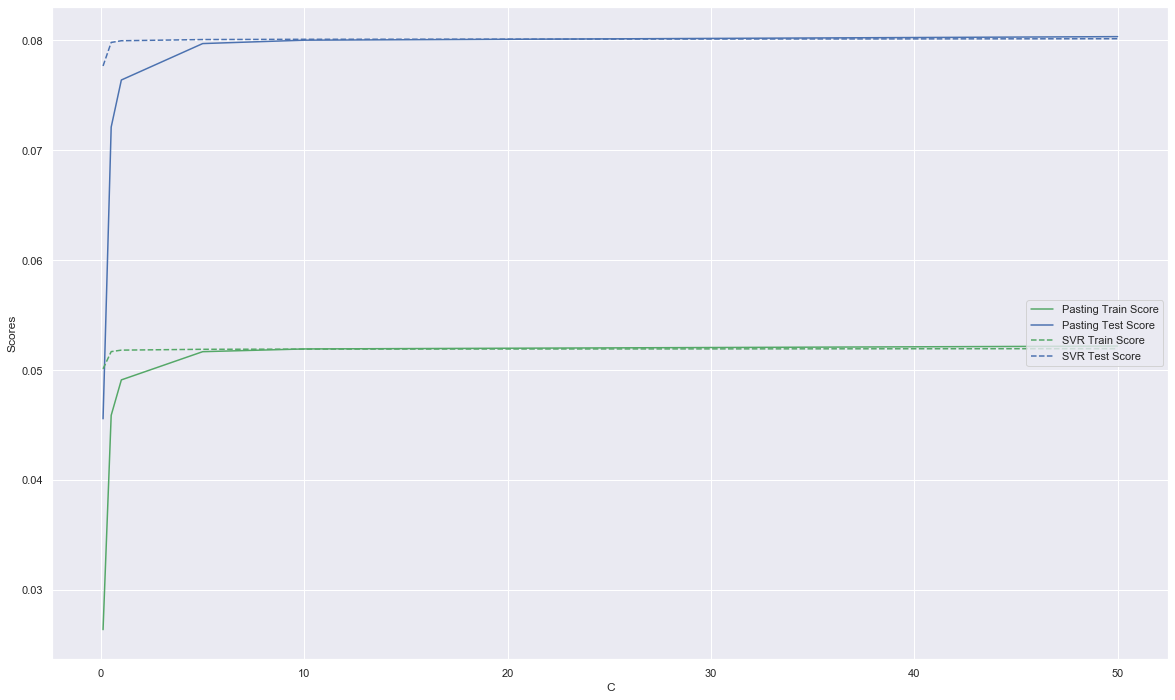

In [22]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

train_score_array = []
test_score_array = []
org_train_score_array = []
org_test_score_array = []

for i in [0.1, 0.5, 1, 5, 10, 50]:
    svm_reg = SVR(kernel='linear', C=i)
    svm_reg.fit(X_train, y_train)
    org_train_score_array.append(svm_reg.score(X_train, y_train))
    org_test_score_array.append(svm_reg.score(X_test, y_test))
    paste_reg_svm = BaggingRegressor(svm_reg, n_estimators=100, max_samples=500, bootstrap=False,random_state=0)
    paste_reg_svm.fit(X_train, y_train)
    train_score_array.append(paste_reg_svm.score(X_train, y_train))
    test_score_array.append(paste_reg_svm.score(X_test, y_test))

x_axis = [0.1, 0.5, 1, 5, 10, 50]
plt.plot(x_axis, train_score_array, c = 'g', label = 'Pasting Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Pasting Test Score')
plt.plot(x_axis, org_train_score_array, c = 'g', label = 'SVR Train Score', linestyle = '--')
plt.plot(x_axis, org_test_score_array, c = 'b', label = 'SVR Test Score', linestyle = '--')
plt.legend(loc=5)
plt.xlabel('C')
plt.ylabel('Scores')

In [23]:
svm_reg = SVR(kernel='linear', C=50)
svm_reg.fit(X_train, y_train)
y_pred=svm_reg.predict(X_test)

paste_reg_svm = BaggingRegressor(svm_reg, n_estimators=500, max_samples=500, bootstrap=False,random_state=0)
paste_reg_svm.fit(X_train, y_train)

y_pred=paste_reg_svm.predict(X_test)

print('Train score: {:.4f}'.format(paste_reg_svm.score(X_train, y_train)))
print('Test score: {:.4f}'.format(paste_reg_svm.score(X_test, y_test)))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 0.0524
Test score: 0.0807
RMSE: 187.8204


# <font color='Red'>Pasting using Decision Tree Regressor

Text(0, 0.5, 'Scores')

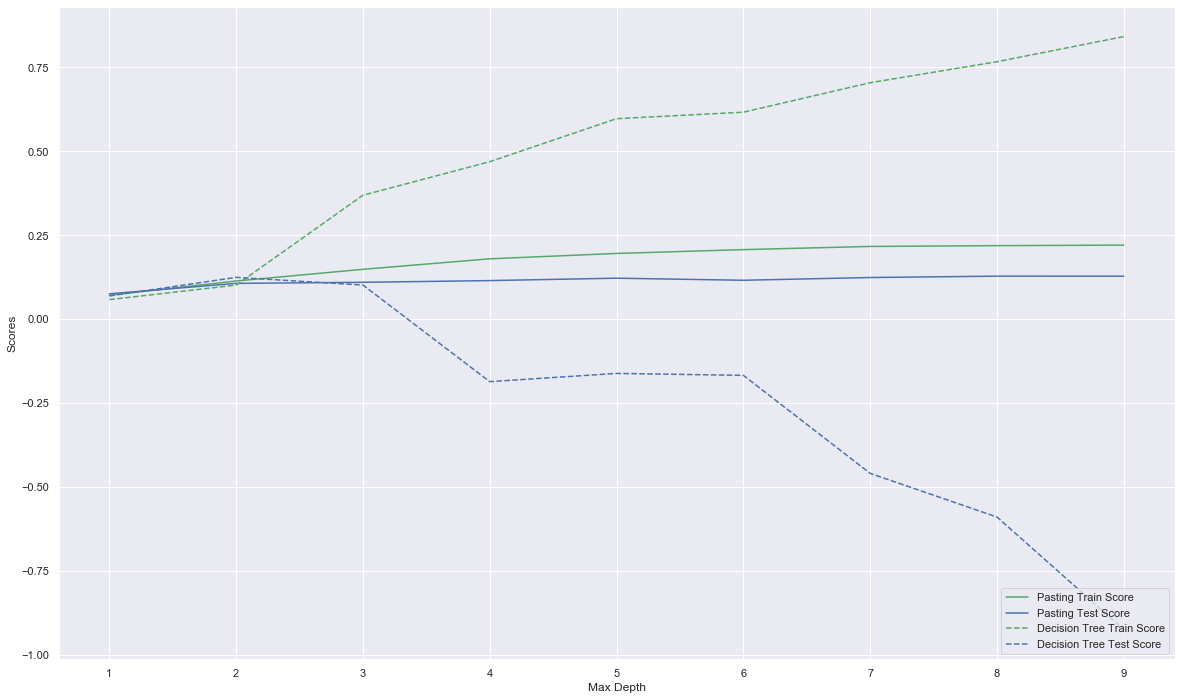

In [24]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

org_train_score_array = []
org_test_score_array = []
train_score_array = []
test_score_array = []

for n in range(1,10):
    dt_reg = DecisionTreeRegressor(max_depth=n,random_state=0)
    dt_reg.fit(X_train, y_train)
    org_train_score_array.append(dt_reg.score(X_train, y_train))
    org_test_score_array.append(dt_reg.score(X_test, y_test))
    paste_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=False,random_state=0)
    paste_reg_dt.fit(X_train, y_train)
    train_score_array.append(paste_reg_dt.score(X_train, y_train))
    test_score_array.append(paste_reg_dt.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Pasting Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Pasting Test Score')
plt.plot(x_axis, org_train_score_array, c = 'g', label = 'Decision Tree Train Score', linestyle = '--')
plt.plot(x_axis, org_test_score_array, c = 'b', label = 'Decision Tree Test Score', linestyle = '--')
plt.legend(loc=4)
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [25]:
dt_reg = DecisionTreeRegressor(max_depth=7,random_state=0)
dt_reg.fit(X_train, y_train)

paste_reg_dt = BaggingRegressor(dt_reg, n_estimators=500, max_samples=500, bootstrap=False,random_state=0)
paste_reg_dt.fit(X_train, y_train)

y_pred=paste_reg_dt.predict(X_test)

print('Train score: {:.4f}'.format(paste_reg_dt.score(X_train, y_train)))
print('Test score: {:.4f}'.format(paste_reg_dt.score(X_test, y_test)))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Train score: 0.2168
Test score: 0.1242
RMSE: 183.3180


# Adaboost

# <font color='Red'>Adaboosting using KNN Neighbors

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score , GridSearchCV

n_estimators_val = [10, 50, 100]
learning_rate_val = [0.1, 0.5, 1]

param_grid = dict(n_estimators = n_estimators_val, learning_rate=learning_rate_val)
knn = KNeighborsRegressor()
ada_reg = AdaBoostRegressor(knn, random_state=0)

adaboost_regressor = GridSearchCV(estimator=ada_reg, param_grid = param_grid )
adaboost_regressor.fit(X_train, y_train)
print ('Best Parameters: ',adaboost_regressor.best_params_)

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 10}


Text(0, 0.5, 'Scores')

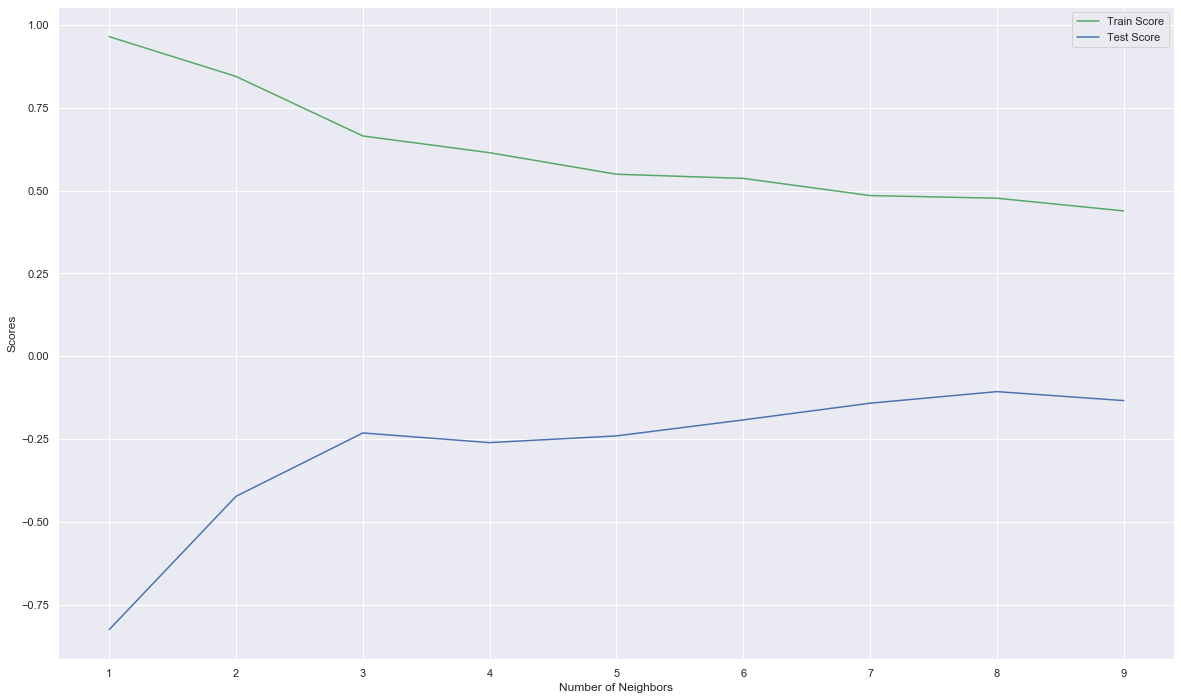

In [27]:
from sklearn.neighbors import KNeighborsRegressor

train_score_array = []
test_score_array = []


for k in range(1,10):
    knn_reg=KNeighborsRegressor(n_neighbors=k)
    ada_reg_knn = AdaBoostRegressor(knn_reg, n_estimators=10,learning_rate=0.1,random_state=0)
    ada_reg_knn.fit(X_train, y_train)
    train_score_array.append(ada_reg_knn.score(X_train, y_train))
    test_score_array.append(ada_reg_knn.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Scores')

# <font color='Red'>Adaboosting using Decision Tree Regressor

In [61]:
n_estimators_val = [10, 50, 100]
learning_rate_val = [0.1, 0.5, 1]

param_grid = dict(n_estimators = n_estimators_val, learning_rate=learning_rate_val)
model=DecisionTreeRegressor(random_state=0)
ada_reg = AdaBoostRegressor(model, random_state=0)

adaboost_regressor = GridSearchCV(estimator=ada_reg, param_grid = param_grid )
adaboost_regressor.fit(X_train, y_train)

print ('Best Parameters: ',adaboost_regressor.best_params_)

Best Parameters:  {'learning_rate': 1, 'n_estimators': 100}


Text(0, 0.5, 'Scores')

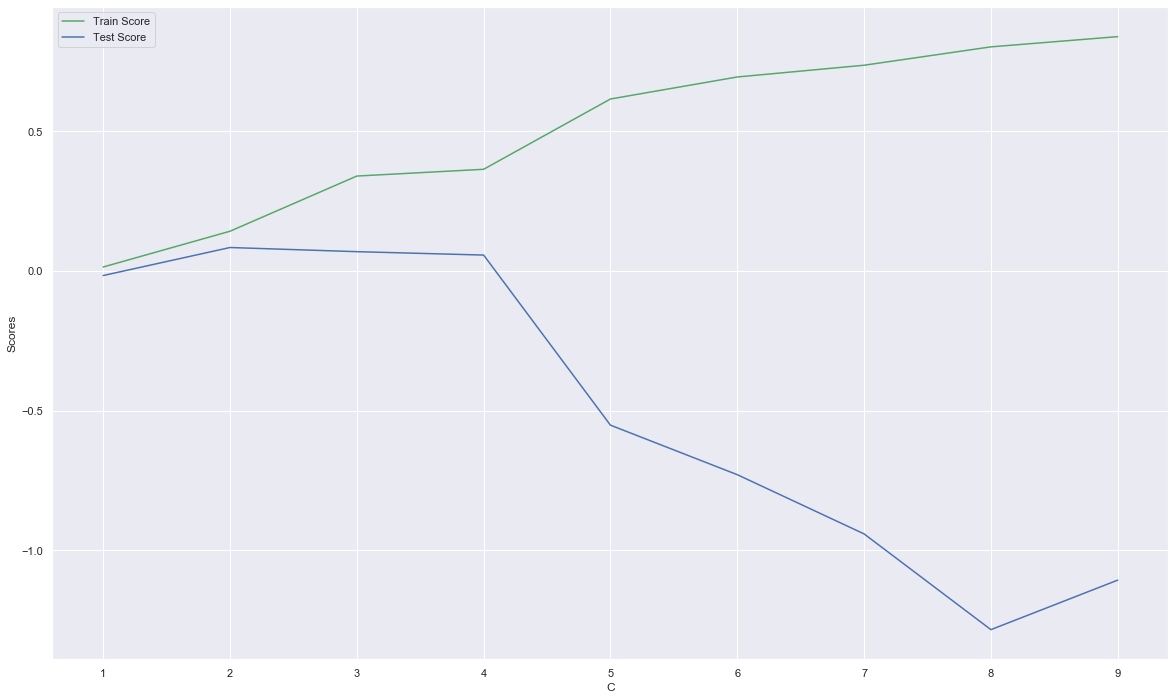

In [29]:
train_score_array = []
test_score_array = []


for n in range(1,10):
    dt_reg=DecisionTreeRegressor(max_depth=n, random_state=0)
    ada_reg_dt = AdaBoostRegressor(dt_reg, n_estimators=10,learning_rate=0.1,random_state=0)
    ada_reg_dt.fit(X_train, y_train)
    train_score_array.append(ada_reg_dt.score(X_train, y_train))
    test_score_array.append(ada_reg_dt.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('C')
plt.ylabel('Scores')

# Gradient Boosting


{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
Train score: 0.13
Test score: 0.11
Mean squared error: 37654.28
R2 score: 0.11


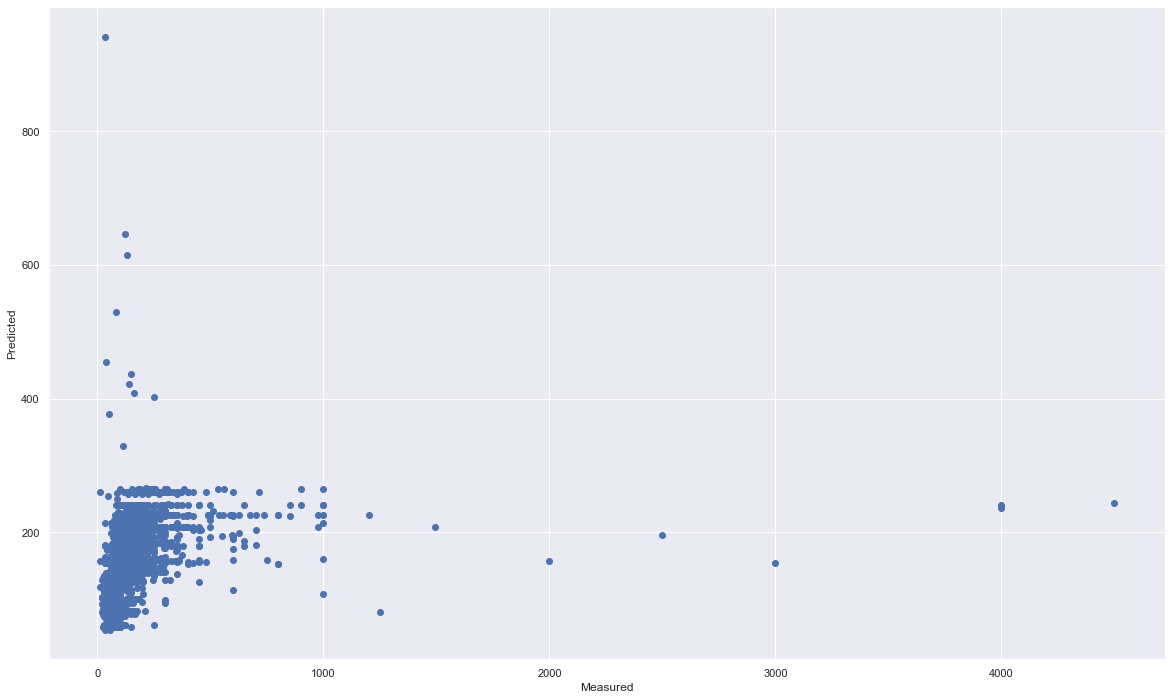

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

n_estimators_val = [50, 100, 200, 500]
learning_rate_val = [0.01, 0.1, 0.5, 1]
max_depth_val = [1, 2, 3, 4]

param_grid = dict(n_estimators = n_estimators_val, learning_rate=learning_rate_val, max_depth=max_depth_val)
gbrg = GradientBoostingRegressor(random_state=0)

gradientboost_regressor = GridSearchCV(estimator=gbrg, param_grid=param_grid)
gradientboost_regressor.fit(X_train, y_train)

print (gradientboost_regressor.best_params_)
print('Train score: {:.2f}'.format(gradientboost_regressor.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gradientboost_regressor.score(X_test, y_test)))

y_pred = gradientboost_regressor.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

# Applying PCA


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
pca.fit(X_train_org)

X_train_reduced = pca.transform(X_train_org)
X_test_reduced = pca.transform(X_test_org)

X_train_reduced.shape

(7000, 11)

# <font color='Red'>Linear Regression

Train Score: 0.08
Test Score: 0.11
Mean squared error: 34216.69
R2 score: 0.11


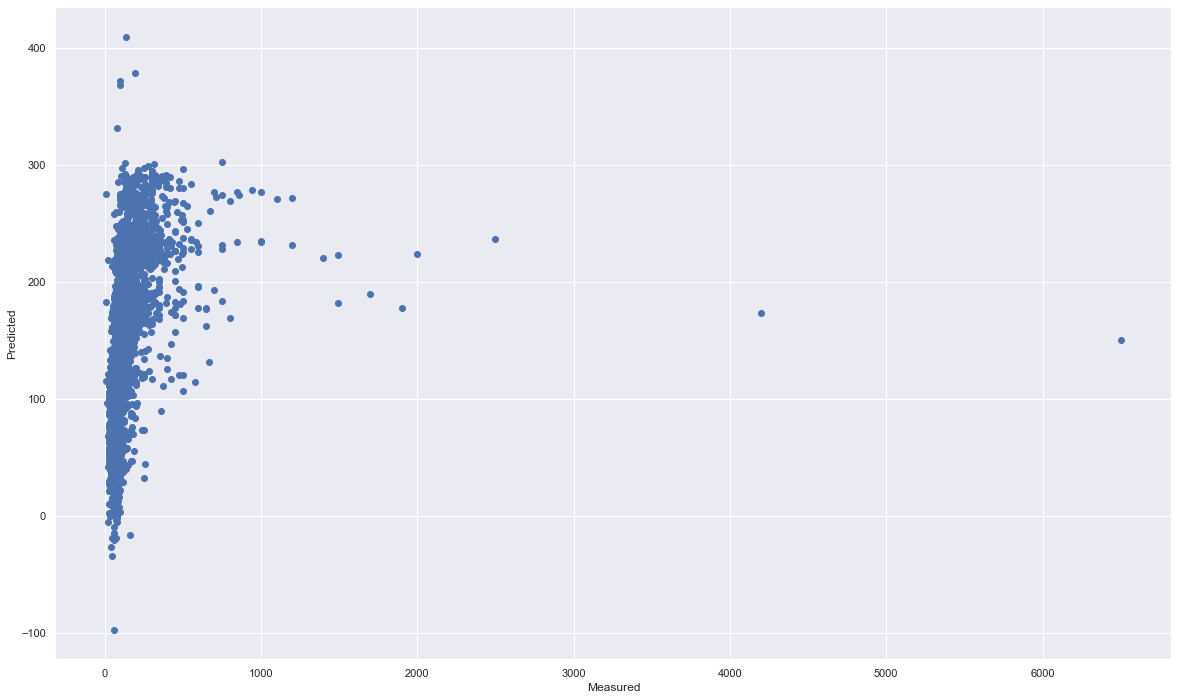

In [35]:
from sklearn import linear_model

# Create linear regression object
lregr = linear_model.LinearRegression()

# Train the model using the training sets
lregr.fit(X_train_reduced, y_train)

# Make predictions using the testing set
y_pred = lregr.predict(X_test_reduced)

# The coefficients
#print('Coefficients: \n', lregr.coef_)

print('Train Score: %.2f'%lregr.score(X_train_reduced,y_train))
print('Test Score: %.2f'%lregr.score(X_test_reduced,y_test))

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

# <font color='Red'>Ridge Regression

Best alpha value 10.0
Train Score 0.08
Test Score 0.11
Mean squared error: 34215.85
R2 score: 0.1083242


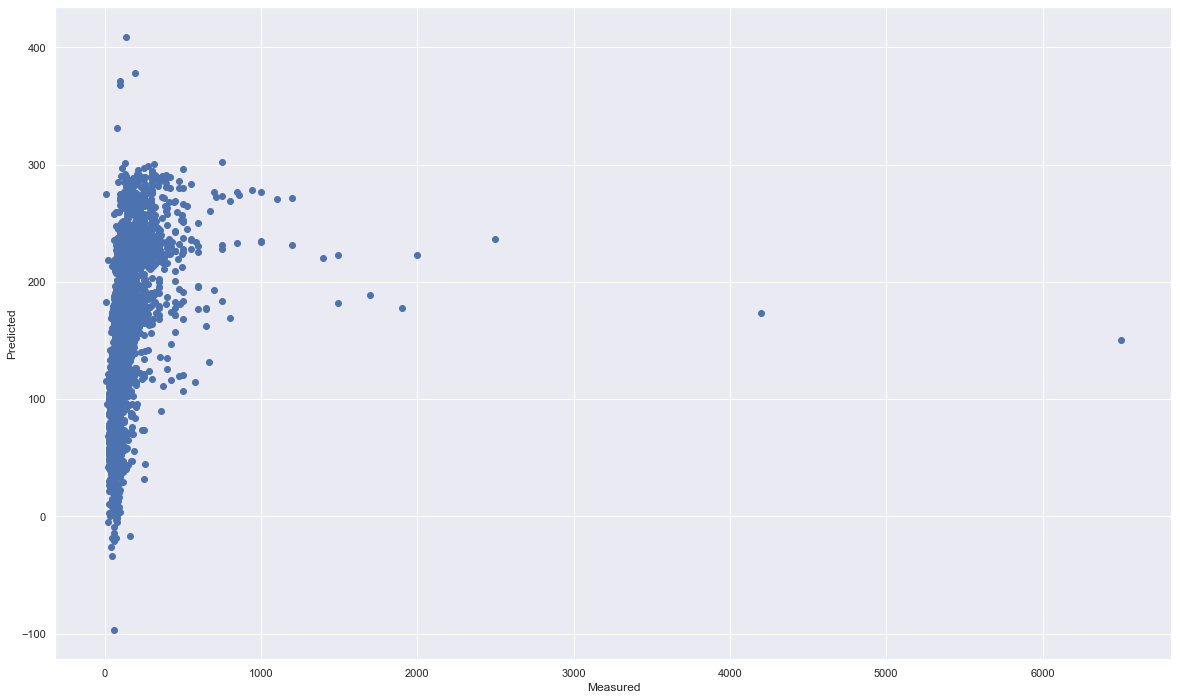

In [37]:
from  sklearn.linear_model import RidgeCV

alphas = np.array([0.01, 0.1, 1, 10])

ridge = RidgeCV(alphas=alphas,cv=5)
ridge.fit(X_train_reduced,y_train)

print('Best alpha value', ridge.alpha_)
print('Train Score %.2f' % ridge.score(X_train_reduced,y_train))
print('Test Score %.2f' % ridge.score(X_test_reduced,y_test))

# Make predictions using the testing set
y_pred = ridge.predict(X_test_reduced)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.7f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

# <font color='Red'>Lasso Regression

Best alpha value 1.0
Train score: 0.08
Test score 0.11
Mean squared error: 34194.64
R2 score: 0.11


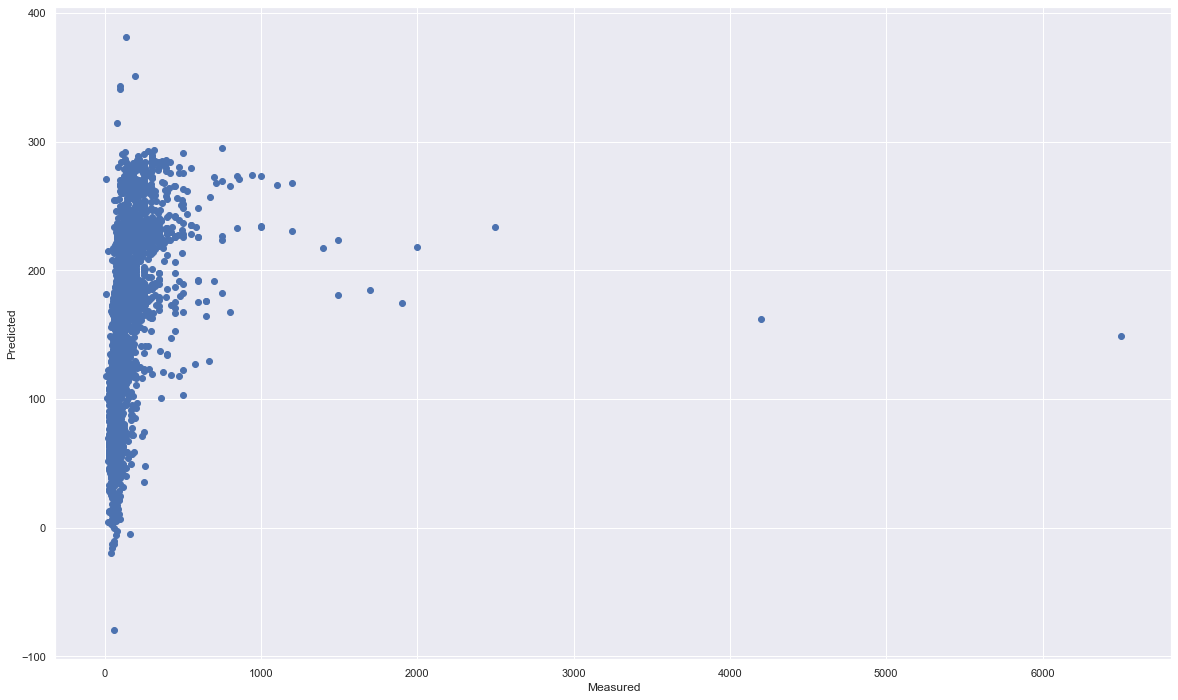

In [38]:
from  sklearn.linear_model import LassoCV

alphas = np.array([0.1, 1, 10, 100])

lasso = LassoCV(alphas=alphas,cv=5)
lasso.fit(X_train_reduced,y_train)

print('Best alpha value', lasso.alpha_)
print('Train score: %.2f' % lasso.score(X_train_reduced,y_train))
print('Test score %.2f' % lasso.score(X_test_reduced,y_test))

# Make predictions using the testing set
y_pred = lasso.predict(X_test_reduced)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

# <font color='Red'>Polynomial Regression

[0.08417451925897423, 0.1094865412720204]
[0.10830229735548003, 0.10124144536061908]


Text(0, 0.5, 'R-Squared')

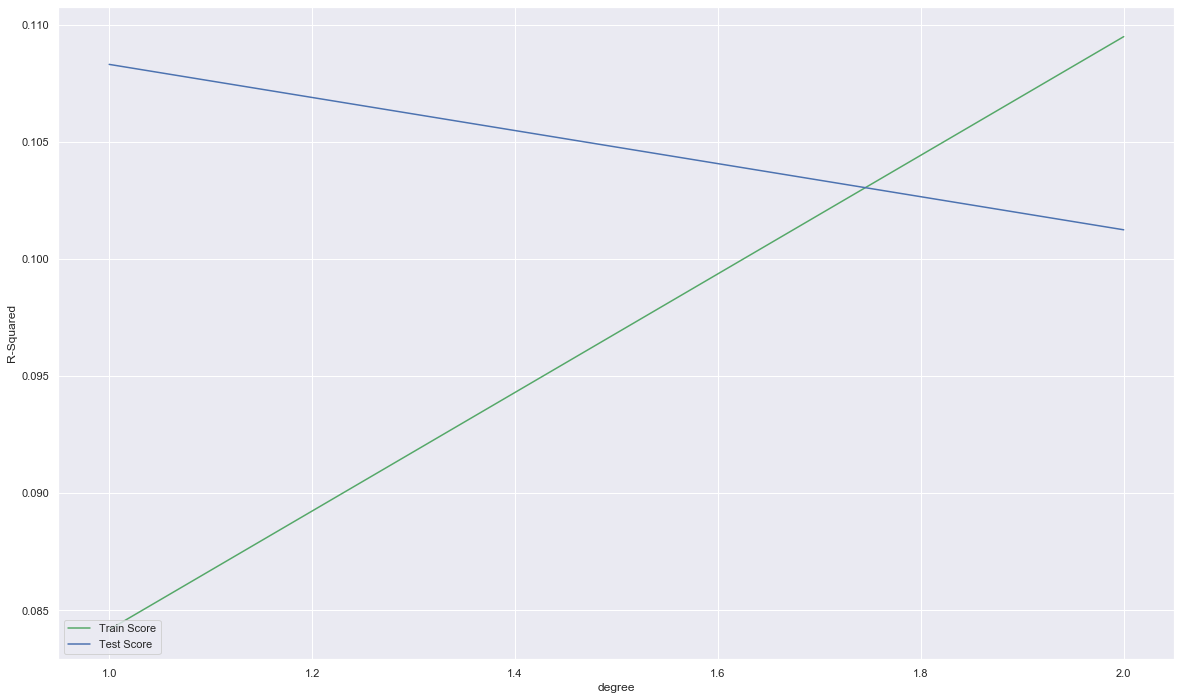

In [40]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
test_score_list = []
regr = linear_model.LinearRegression()

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_test_poly = poly.transform(X_test_reduced)
    regr.fit(X_train_poly, y_train)
    train_score_list.append(regr.score(X_train_poly, y_train))
    test_score_list.append(regr.score(X_test_poly, y_test))


print(train_score_list)
print(test_score_list)

plt.plot(range(1,3), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(1,3), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.xlabel(r'degree')
plt.ylabel(r'R-Squared')

# <font color='Red'>KNN Regression

In [43]:
from sklearn import neighbors

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

knn_reg = GridSearchCV(knn, params, cv=5)
knn_reg.fit(X_train_reduced,y_train)

print (knn_reg.best_params_)
print('Train score: {:.2f}'.format(knn_reg.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(knn_reg.score(X_test_reduced, y_test)))

# Make predictions using the testing set
y_pred = knn_reg.predict(X_test_reduced)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

{'n_neighbors': 9}
Train score: 0.27
Test score: 0.15
Mean squared error: 32580.02
R2 score: 0.15


# <font color='Red'>SVM Regression


Best parameters set found : {'C': 50, 'gamma': 0.1, 'kernel': 'rbf'}
Train score 0.0843895713999313
Test score 0.10955135325986398
Mean squared error: 34168.76
R2 score: 0.1095514


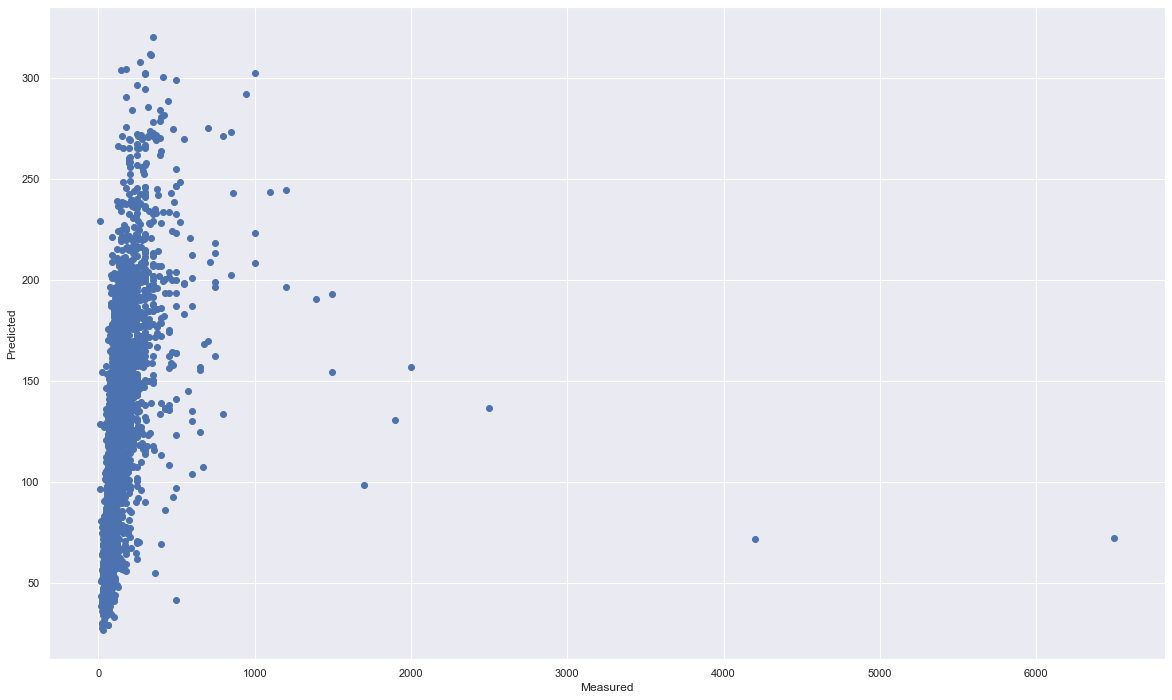

In [44]:
C = [0.1, 0.5, 1, 5, 10, 50]
param_grid = [
     {'C': C, 'kernel': ['linear']},
     {'C': C, 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
     {'degree': [2,3,4], 'kernel': ['poly']},
     {'coef0': [0.0], 'kernel': ['sigmoid']} 
]
model = SVR()
svm_reg = GridSearchCV(model, param_grid, cv = 5)

svm_reg.fit(X_train_reduced, y_train)

print("Best parameters set found :", svm_reg.best_params_)
print('Train score',svm_reg.score(X_train_reduced,y_train))
print('Test score',svm_reg.score(X_test_reduced,y_test))

y_pred = svm_reg.best_estimator_.predict(X_test_reduced)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.7f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test,y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

# <font color='Green'> Comparison of results with PCA and without PCA:


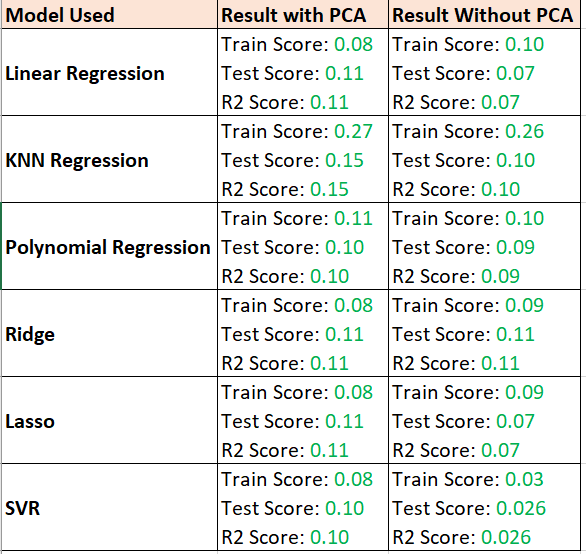

##### <font color='Blue'> From this we understand that, for few models, if PCA is applied the results are better and for few it's not. 
    
    For KNN regressor the model was better with PCA but not without PCA.
    Likewise, Polynomial Regression has a better train score with PCA than without PCA.

# Deep Learning Model

In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [48]:
X_train.shape

(7000, 15)

# <font color='Red'>Input Layer


We use the sigmoid activation function since it is always going to be in range (0,1) compared to (-inf, inf) of linear function. So we have our activations bound in a range and it won’t blow up the activations then.



# <font color='Red'>Output Layer
    

ReLu is nonlinear in nature,and combinations of ReLu are also non linear. ReLu also allows for sparse and efficient activations



In [50]:
#step 1: build the model
model1 = Sequential()
#input layer
model1.add(Dense(32, input_dim = 15, activation = 'sigmoid'))

#output layer
model1.add(Dense(1, activation = 'relu'))

#step 2: compile the model
model1.compile(loss = 'mse', optimizer = 'sgd', metrics = ['acc'])

#step 3: train the model
model1.fit(X_train,y_train, epochs = 20, batch_size = 256)

Epoch 1/20
7000/7000 [==============================] - 0s 16us/sample - loss: 63069.4506 - acc: 0.0000e+00
Epoch 2/20
7000/7000 [==============================] - 0s 4us/sample - loss: 58118.7544 - acc: 0.0000e+00
Epoch 3/20
7000/7000 [==============================] - 0s 3us/sample - loss: 57927.7013 - acc: 0.0000e+00
Epoch 4/20
7000/7000 [==============================] - 0s 4us/sample - loss: 57727.8343 - acc: 0.0000e+00
Epoch 5/20
7000/7000 [==============================] - 0s 3us/sample - loss: 57403.8988 - acc: 0.0000e+00
Epoch 6/20
7000/7000 [==============================] - 0s 4us/sample - loss: 57319.0596 - acc: 0.0000e+00
Epoch 7/20
7000/7000 [==============================] - 0s 4us/sample - loss: 57198.6552 - acc: 0.0000e+00
Epoch 8/20
7000/7000 [==============================] - 0s 3us/sample - loss: 56807.0644 - acc: 0.0000e+00
Epoch 9/20
7000/7000 [==============================] - 0s 4us/sample - loss: 56807.3667 - acc: 0.0000e+00
Epoch 10/20
7000/7000 [=============

In [51]:
#model evaluation

model1.evaluate(X_train, y_train)

7000/7000 [==============================] - 0s 15us/sample - loss: 56033.9791 - acc: 0.0000e+00


[56033.97905022321, 0.0]

In [52]:
model1.evaluate(X_test, y_test)

3001/3001 [==============================] - 0s 13us/sample - loss: 33362.7340 - acc: 0.0000e+00


[33362.73403819821, 0.0]

In [53]:
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressory_pred = model1.predict(X_train)
print("R2 value: %.2f" % r2_score(y_test, model1.predict(X_test)))

R2 value: 0.13


# <font color = 'Green'> Conclusion: Polynomial was the better model in terms of R2 in Project 1 without PCA but in Project 2 KNN was better with PCA applied . 

# Dataset -2 Regression


# Introduction

    This dataset contains daily weather observations from numerous Australian weather stations.

    The target variable RainTomorrow means: Did it rain the next day? Yes or No.
  
    This dataset is taken from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

# Aim
    Predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow


In [27]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
%matplotlib inline

In [28]:
path = "/Users/mehraj/Documents"
data_dir = os.path.join(path,'weatherAUS.csv')

In [8]:
df = pd.read_csv(data_dir)
df = pd.DataFrame(df)
df = df.sample(5000,random_state=0)

In [9]:
a = df.isnull().sum().sum()
b = df.shape[0]*df.shape[1]
c = a/b
c

0.09516666666666666

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 86232 to 120597
Data columns (total 24 columns):
Date             5000 non-null object
Location         5000 non-null object
MinTemp          4968 non-null float64
MaxTemp          4986 non-null float64
Rainfall         4937 non-null float64
Evaporation      2813 non-null float64
Sunshine         2592 non-null float64
WindGustDir      4640 non-null object
WindGustSpeed    4642 non-null float64
WindDir9am       4650 non-null object
WindDir3pm       4854 non-null object
WindSpeed9am     4951 non-null float64
WindSpeed3pm     4896 non-null float64
Humidity9am      4947 non-null float64
Humidity3pm      4869 non-null float64
Pressure9am      4459 non-null float64
Pressure3pm      4458 non-null float64
Cloud9am         3123 non-null float64
Cloud3pm         2989 non-null float64
Temp9am          4974 non-null float64
Temp3pm          4895 non-null float64
RainToday        4937 non-null object
RISK_MM          5000 non-null floa

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,4968.000000,4986.000000,4937.000000,2813.000000,2592.000000,4642.000000,4951.000000,4896.000000,4947.000000,4869.000000,4459.000000,4458.000000,3123.000000,2989.000000,4974.000000,4895.000000,5000.000000
mean,12.301550,23.262254,2.175977,5.426200,7.733488,39.964240,13.987881,18.763276,68.546796,51.428425,1017.560552,1015.152467,4.399296,4.473402,17.082409,21.691747,2.429500
std,6.406394,7.110093,7.067665,3.888092,3.727567,13.689653,8.908687,8.940967,19.050160,20.825045,7.180850,7.088350,2.869971,2.733422,6.508836,6.958441,9.282277
min,-6.900000,-4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,5.000000,1.000000,982.000000,986.400000,0.000000,0.000000,-4.200000,-4.400000,0.000000
25%,7.700000,18.100000,0.000000,2.600000,5.100000,31.000000,7.000000,13.000000,57.000000,36.000000,1012.900000,1010.400000,1.000000,2.000000,12.400000,16.800000,0.000000
50%,12.100000,22.700000,0.000000,4.800000,8.600000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.900000,21.100000,0.000000
75%,16.900000,28.300000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.300000,1019.800000,7.000000,7.000000,21.700000,26.500000,0.800000
max,29.100000,44.400000,164.200000,58.500000,14.300000,115.000000,72.000000,78.000000,100.000000,100.000000,1039.200000,1036.900000,8.000000,8.000000,34.800000,43.400000,268.600000


# Data Cleansing

In [10]:
for column in ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 86232 to 120597
Data columns (total 24 columns):
Date             5000 non-null object
Location         5000 non-null object
MinTemp          4968 non-null float64
MaxTemp          4986 non-null float64
Rainfall         4937 non-null float64
Evaporation      2813 non-null float64
Sunshine         2592 non-null float64
WindGustDir      5000 non-null object
WindGustSpeed    4642 non-null float64
WindDir9am       5000 non-null object
WindDir3pm       5000 non-null object
WindSpeed9am     4951 non-null float64
WindSpeed3pm     4896 non-null float64
Humidity9am      4947 non-null float64
Humidity3pm      4869 non-null float64
Pressure9am      4459 non-null float64
Pressure3pm      4458 non-null float64
Cloud9am         3123 non-null float64
Cloud3pm         2989 non-null float64
Temp9am          4974 non-null float64
Temp3pm          4895 non-null float64
RainToday        5000 non-null object
RISK_MM          5000 non-null floa

In [11]:
#Rainfall,Evaporation,WindGustSpeed,WindSpeed9AM,WindSpeed3pm,RISK_MM. These numerical columns have big outliers. So we better replace them with Median than Mean.
#Also 'MinTemp', 'MaxTemp','Sunshine','Pressure9am','Pressure3pm','Temp9am','Temp3am' have float values so we would still use mean to replace them although they have major outliers
# The rest of the columns are replaced with Mean
for column in ['MinTemp', 'MaxTemp','Rainfall', 'Evaporation','Sunshine','WindGustSpeed', 'WindSpeed9am','WindSpeed3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RISK_MM']:
    df[column].fillna(df[column].mean(), inplace=True)
for column in ['Humidity9am','Humidity3pm','Cloud9am','Cloud3pm']:
    df[column].fillna(df[column].median(), inplace=True)    

In [12]:
#Date is a important variable to predict the rainfall. We gonna consider individual effects of Day, Year and Month
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace = True)

In [13]:
X = df.drop(['RainTomorrow'],axis=1)
Y = df['RainTomorrow']
Y

86232      No
57576      No
124071     No
117955     No
133468     No
136631     No
75844     Yes
21853     Yes
19088      No
132305     No
5116       No
88317      No
10199      No
99978      No
67905     Yes
69997      No
113501     No
18691      No
127091     No
123644     No
132401     No
56496      No
115907     No
70019      No
59319      No
124566     No
84571     Yes
34111      No
15269      No
131844    Yes
         ... 
71327     Yes
70705      No
60579     Yes
115391     No
56477     Yes
26432     Yes
5318       No
103055     No
96941      No
106231    Yes
29577     Yes
43506     Yes
139943     No
21342      No
6967       No
93312      No
137465     No
16885     Yes
39627      No
45508      No
2703       No
52649      No
101646     No
74619      No
64957      No
68406     Yes
119955     No
49562      No
40925      No
120597    Yes
Name: RainTomorrow, Length: 5000, dtype: object

In [14]:
X = pd.get_dummies(X,columns=['Location','WindGustDir','WindDir9am','WindDir3pm'], prefix=['Location','WindGustDir','WindDir9am','WindDir3pm'])


In [15]:
from sklearn import preprocessing
import pandas as pd

le = preprocessing.LabelEncoder()
le.fit(X['RainToday'])
le.fit(Y)

LabelEncoder()

In [16]:
X['RainToday'] = le.transform(X['RainToday']) 
Y = le.transform(Y) 

In [17]:
Y

array([0, 0, 0, ..., 0, 0, 1])

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#I'm using MinMaxScaler to ignore the effect of outliers
X_train_org, X_test_org, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
 

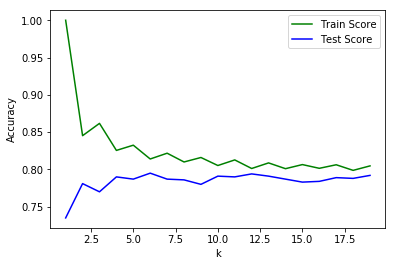

In [18]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [19]:
knn = KNeighborsClassifier(12)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8013
Test score: 0.7940


C:\Users\mehraj\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


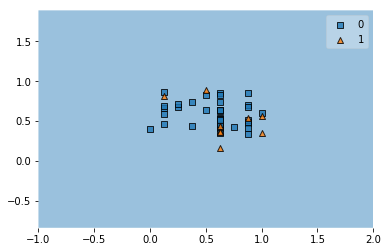

In [20]:
from mlxtend.plotting import plot_decision_regions

X_b = X_train[100:150,[13,14]]
y_b = y_train[100:150]

knn = KNeighborsClassifier(12)
knn.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = knn)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs')
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

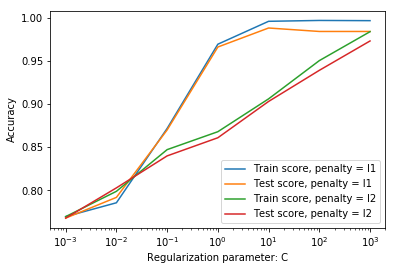

In [22]:
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
#Lasso = L1 & Ridge = L2

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9965
0.987


C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


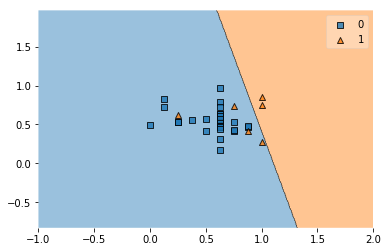

In [23]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

X_b = X_test[10:50,[13,14]]
y_b = y_test[10:50]

lreg = LogisticRegression(C=10,penalty= 'l1')
lreg.fit(X_train,y_train)
print(lreg.score(X_train,y_train))
print(lreg.score(X_test,y_test))
lreg.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = lreg)

# SVC(finding best model in Linear,RBF,Polynomial kernels)

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


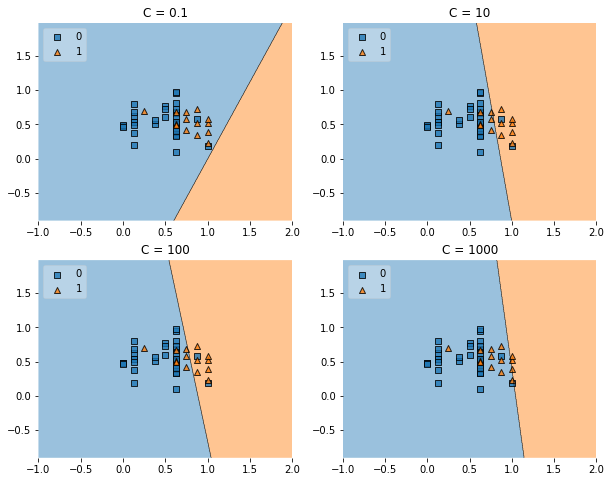

In [24]:
from sklearn.svm import SVC, LinearSVC
import matplotlib.gridspec as gridspec
import itertools

X_b = X_test[50:100,[13,14]]
Y_b = y_test[50:100,]

clf1 = LinearSVC(C=0.1)
clf2 = LinearSVC(C=10)
clf3 = LinearSVC(C=100)
clf4 = LinearSVC(C=1000)


gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['C = 0.1',
          'C = 10',
          'C = 100',
          'C = 1000']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_b, Y_b)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_b, y=Y_b,
                                clf=clf, legend=2)
    plt.title(lab)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e+2],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                   {'kernel':['poly'], 'degree':[1e-1,1e+2,1e+3], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mehraj\Anaconda3\lib\site-packages\skle

Best parameters set found on development set:

{'C': 1000, 'kernel': 'linear'}

Grid scores on development set:

0.815 (+/-0.022) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.385 (+/-0.000) for {'C': 1, 'gamma': 100.0, 'kernel': 'rbf'}
0.797 (+/-0.038) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.585 (+/-0.490) for {'C': 10, 'gamma': 100.0, 'kernel': 'rbf'}
0.772 (+/-0.042) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.585 (+/-0.490) for {'C': 100, 'gamma': 100.0, 'kernel': 'rbf'}
0.769 (+/-0.043) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.585 (+/-0.490) for {'C': 1000, 'gamma': 100.0, 'kernel': 'rbf'}
0.855 (+/-0.031) for {'C': 1, 'kernel': 'linear'}
0.955 (+/-0.007) for {'C': 10, 'kernel': 'linear'}
0.981 (+/-0.003) for {'C': 100, 'kernel': 'linear'}
0.984 (+/-0.007) for {'C': 1000, 'kernel': 'linear'}
0.385 (+/-0.000) for {'C': 1, 'degree': 0.1, 'kernel': 'poly'}
0.385 (+/-0.000) for {'C': 1, 'degree': 100.0, 'kernel': 'poly'}
0.385 (+/-0.000) for {'C': 1, 'degree': 1000.

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

Best parameters set found on development set:

{'C': 1000, 'kernel': 'linear'}

Grid scores on development set:

0.690 (+/-0.021) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 1, 'gamma': 100.0, 'kernel': 'rbf'}
0.752 (+/-0.027) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.501 (+/-0.003) for {'C': 10, 'gamma': 100.0, 'kernel': 'rbf'}
0.753 (+/-0.031) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.501 (+/-0.003) for {'C': 100, 'gamma': 100.0, 'kernel': 'rbf'}
0.751 (+/-0.031) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.501 (+/-0.003) for {'C': 1000, 'gamma': 100.0, 'kernel': 'rbf'}
0.745 (+/-0.023) for {'C': 1, 'kernel': 'linear'}
0.833 (+/-0.028) for {'C': 10, 'kernel': 'linear'}
0.934 (+/-0.013) for {'C': 100, 'kernel': 'linear'}
0.974 (+/-0.005) for {'C': 1000, 'kernel': 'linear'}
0.500 (+/-0.000) for {'C': 1, 'degree': 0.1, 'kernel': 'poly'}
0.500 (+/-0.000) for {'C': 1, 'degree': 100.0, 'kernel': 'poly'}
0.500 (+/-0.000) for {'C': 1, 'degree': 1000.

In [26]:
linear_svc = SVC(C=1000, kernel='linear')
scores.append(linear_svc.fit(X_train, y_train).score(X_train, y_train))
scores.append(linear_svc.fit(X_train, y_train).score(X_test, y_test))
print(scores)

['precision', 'recall', 0.9965, 0.989]


# LinearSVC Classification

In [27]:
tuned_parameters = [{'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LinearSVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Best parameters set found on development set:

{'C': 100}

Grid scores on development set:

0.903 (+/-0.013) for {'C': 1}
0.963 (+/-0.009) for {'C': 10}
0.981 (+/-0.004) for {'C': 100}
0.965 (+/-0.064) for {'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       768
           1       1.00      0.90      0.95       232

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.95      0.97      1000
weighted avg       0.98      0.98      0.98      1000


# Tuning hyper-parameters for recall



C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Best parameters set found on development set:

{'C': 100}

Grid scores on development set:

0.791 (+/-0.010) for {'C': 1}
0.884 (+/-0.012) for {'C': 10}
0.947 (+/-0.056) for {'C': 100}
0.936 (+/-0.012) for {'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       768
           1       1.00      0.85      0.92       232

   micro avg       0.96      0.96      0.96      1000
   macro avg       0.98      0.92      0.95      1000
weighted avg       0.97      0.96      0.96      1000




C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:
linearsvc = LinearSVC(C=1000)
linearsvc.fit(X_train,y_train)
print(linearsvc.score(X_train,y_train))
print(linearsvc.score(X_test,y_test))

0.983
0.973


C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Decision Tree Classification 

In [29]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [30]:

# Define the parameter values that should be searched
sample_split_range = list(range(2, 50))

# Create a parameter grid: map the parameter names to the values that should be searched
# Simply a python dictionary
# Key: parameter name
# Value: list of values that should be searched for that parameter
# Single key-value pair for param_grid
param_grid = dict(min_samples_split = sample_split_range)

# instantiate the grid
grid = GridSearchCV(dtree, param_grid, cv=10, scoring='accuracy')

grid.fit(X_train, y_train)
print(grid.best_score_)

print(grid.best_params_)
# fit the grid with data
grid.fit(X_test, y_test)

1.0
{'min_samples_split': 2}


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [31]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

1.0
{'min_samples_split': 2}


In [32]:
dtree.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
#   Model(Best Parameters)              	Train Score     	Test Score
# KNN(k=12)                             	0.8013          	0.794
# Log.Regression(Penalty = 'l1', C=10)  	0.99625         	0.987
# SVC(kernel='linear', C=1000)          	0.9965          	0.989
# LinearSVC(C=1000)                     	0.95875         	0.949
# DecisionTree(min_splits = 2)          	1               	1
# Decision tree is the best model

# Voting Classifiers

# Hard Voting

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(12)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 100, probability = True)
svm_clf.fit(X_train, y_train)

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [41]:
#Each algorithm is run and best accuracy is determined by using hard voting
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
  # The accuracy is 0.871 determined by hard voting which uses predicted class labels for majority rule voting  

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.865
KNeighborsClassifier 0.794


C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.892


C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.871


# Soft Voting

In [42]:
#Each algorithm is run and best accuracy is determined by using soft voting
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
# The accuracy is 0.868 determined by hard voting which predicts the class label based on the argmax of the sums of the predicted probabilitie 

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.865
KNeighborsClassifier 0.794


C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.892


C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.868


# Decision Tree using Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [44]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [45]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
#There's no effect than without bagging

Train score: 1.00
Test score: 1.00


# KNN Classifier using Bagging

In [46]:
knn_clf = KNeighborsClassifier(n_neighbors=12)
bag_clf = BaggingClassifier(knn_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [48]:
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
print(accuracy_score(y_test, y_pred))
#Overfiting has been reduced a little by bagging. The accuracy is same for both train and test

Train score: 0.77
Test score: 0.77
0.769


# Logistic Regression with Pasting

In [50]:
log_clf = LogisticRegression()
bag_clf = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

0.812


In [51]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
#Overfitting has reduced overfitting in Logistic too, The train and test accuracies are almost similar with Pasting

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Train score: 0.80
Test score: 0.81


# Linear SVC Kernel using Pasting

In [30]:
svm_clf = SVC(C = 100, kernel = 'linear', probability = True)

bag_clf = BaggingClassifier(svm_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.774


In [32]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
# Pasting showed great effect with linear svc Kernel as well

Train score: 0.77
Test score: 0.77


# Logistic Regression using AdaBoost Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

ada_clf = AdaBoostClassifier(LogisticRegression())
ada_clf.fit(X_train, y_train)

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [20]:
y_pred = ada_clf.predict(X_test)

from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.828


In [21]:
ada_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))
#Adaboost Classifier increased accuracy of Logistic as expected as it tweaks misclassified instances

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Train score: 0.82
Test score: 0.83


# Adaboost Classifier for Linear Kernel

In [22]:
from sklearn.svm import SVC
linsvc_clf = AdaBoostClassifier(SVC(C=100,kernel='linear',probability = True))
linsvc_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [24]:
y_pred = linsvc_clf.predict(X_test)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print('Train score: {:.2f}'.format(linsvc_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(linsvc_clf.score(X_test, y_test)))

0.793
Train score: 0.79
Test score: 0.79


# Gradient Boost Classifier

In [69]:
from  sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=1, learning_rate = 1.0, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [70]:
y_pred = gbrt.predict(X_test)

gbrt.fit(X_train, y_train)
print('Train score: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gbrt.score(X_test, y_test)))
#Gradient Boost Classifier works best

Train score: 1.00
Test score: 1.00


# Running PCA on all models 

In [71]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [72]:
X_train_img = pca.transform(X_train)
X_test_img = pca.transform(X_test)

# Running KNN using GridSearch and PCA

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


#create new a knn model
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)

#fit model to data
knn_gscv.fit(X_train_img, y_train)

print("Best parameter is {}".format(knn_gscv.best_params_))
print("Best score is {:.4f}".format(knn_gscv.best_score_))

Best parameter is {'n_neighbors': 15}
Best score is 0.7913


In [74]:
print("Train Score:%f" %knn_gscv.score(X_train_img, y_train))
print("Test Score: %f" %knn_gscv.score(X_test_img, y_test))

Train Score:0.803000
Test Score: 0.782000


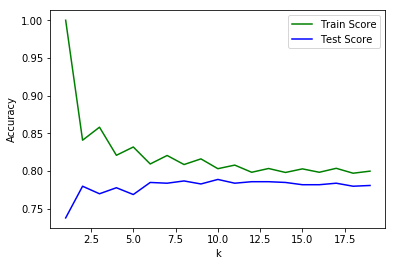

In [75]:
from sklearn.model_selection import cross_val_score
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_img, y_train)
    train_score_array.append(knn.score(X_train_img,y_train))
    test_score_array.append(knn.score(X_test_img,y_test))


x_axis = range(1,20)

%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

# Running Logistic Regression using GridSearch and PCA

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


lreg = LogisticRegression(max_iter = 100)
param_grid = {'C': (0.01, 0.1, 1, 10, 100), 'penalty': ('l1','l2') }


grid_search = GridSearchCV(lreg, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_img, y_train)

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': (0.01, 0.1, 1, 10, 100), 'penalty': ('l1', 'l2')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [77]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'penalty': 'l1'}
Best cross-validation score: 0.8290


C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.96925
0.966


C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


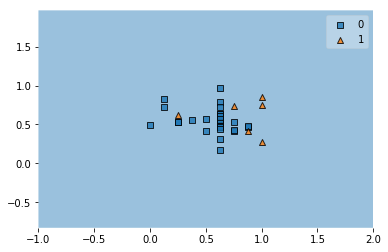

In [78]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

X_b = X_test[10:50,[13,14]]
y_b = y_test[10:50]

lreg = LogisticRegression(C=1,penalty= 'l1')
lreg.fit(X_train,y_train)
print(lreg.score(X_train,y_train))
print(lreg.score(X_test,y_test))
lreg.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = lreg)

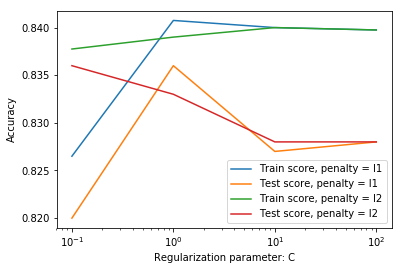

In [79]:
c_range = [0.1, 1, 10, 100]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []
for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c,solver='saga',max_iter = 10000)
    log_l2 = LogisticRegression(penalty = 'l2', C = c,solver='lbfgs',max_iter = 10000)
    log_l1.fit(X_train_img, y_train)
    log_l2.fit(X_train_img, y_train)
    train_score_l1.append(log_l1.score(X_train_img, y_train))
    train_score_l2.append(log_l2.score(X_train_img, y_train))
    test_score_l1.append(log_l1.score(X_test_img, y_test))
    test_score_l2.append(log_l2.score(X_test_img, y_test))
    

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

# Running LinearSVC using GridSearch and PCA

In [100]:
## grid Search
from sklearn.svm import LinearSVC
svm = LinearSVC(max_iter = 100000)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LinearSVC(), param_grid, cv=5, return_train_score=True)

In [101]:
grid_search.fit(X_train_img, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Best parameters: {'C': 0.1}
Best cross-validation score: 0.8273


C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [97]:
print("Train Score:%f" %grid_search.score(X_train_img, y_train))
print("Test Score: %f" %grid_search.score(X_test_img, y_test))

Train Score:0.836750
Test Score: 0.829000


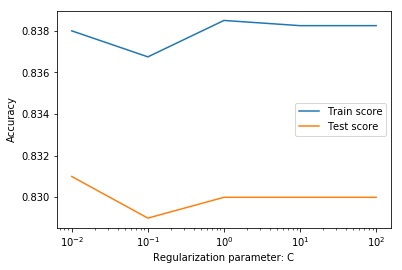

In [98]:
c_range = [0.01,0.1,1,10,100]

train_score = []
test_score = []
for c in c_range:
    lsvc = LinearSVC(C= c, max_iter = 100000)
    lsvc.fit(X_train_img,y_train)
    train_score.append(lsvc.score(X_train_img, y_train))
    test_score.append(lsvc.score(X_test_img, y_test))
    

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [99]:
scoress = []
linear_svc = LinearSVC(C=0.1)
scoress.append(linear_svc.fit(X_train_img, y_train).score(X_train_img, y_train))
scoress.append(linear_svc.fit(X_train_img, y_train).score(X_test_img, y_test))
print(score)

[0.84125, 0.827]


# Running all SVC Kernels with PCA and finding best Kernel suitable to data

In [103]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e+2],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                   {'kernel':['poly'], 'degree':[1e-1,1e+2,1e+3], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train_img, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test_img)
    print(classification_report(y_true, y_pred))
    print()
    # The best kernel here is rbf kernel with C = 10 and gamma = 0.1

# Tuning hyper-parameters for precision



C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mehraj\Anaconda3\lib\site-packages\skle

Best parameters set found on development set:

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

0.787 (+/-0.022) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.585 (+/-0.490) for {'C': 1, 'gamma': 100.0, 'kernel': 'rbf'}
0.741 (+/-0.045) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.585 (+/-0.490) for {'C': 10, 'gamma': 100.0, 'kernel': 'rbf'}
0.706 (+/-0.049) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.585 (+/-0.490) for {'C': 100, 'gamma': 100.0, 'kernel': 'rbf'}
0.696 (+/-0.039) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.585 (+/-0.490) for {'C': 1000, 'gamma': 100.0, 'kernel': 'rbf'}
0.768 (+/-0.018) for {'C': 1, 'kernel': 'linear'}
0.765 (+/-0.027) for {'C': 10, 'kernel': 'linear'}
0.764 (+/-0.030) for {'C': 100, 'kernel': 'linear'}
0.765 (+/-0.031) for {'C': 1000, 'kernel': 'linear'}
0.385 (+/-0.000) for {'C': 1, 'degree': 0.1, 'kernel': 'poly'}
0.385 (+/-0.000) for {'C': 1, 'degree': 100.0, 'kernel': 'poly'}
0.385 (+/-0.000) for {'C': 1, 'degree

C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mehraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

0.673 (+/-0.015) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.501 (+/-0.003) for {'C': 1, 'gamma': 100.0, 'kernel': 'rbf'}
0.707 (+/-0.041) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.501 (+/-0.003) for {'C': 10, 'gamma': 100.0, 'kernel': 'rbf'}
0.699 (+/-0.043) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.501 (+/-0.003) for {'C': 100, 'gamma': 100.0, 'kernel': 'rbf'}
0.692 (+/-0.035) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.501 (+/-0.003) for {'C': 1000, 'gamma': 100.0, 'kernel': 'rbf'}
0.697 (+/-0.010) for {'C': 1, 'kernel': 'linear'}
0.698 (+/-0.017) for {'C': 10, 'kernel': 'linear'}
0.698 (+/-0.019) for {'C': 100, 'kernel': 'linear'}
0.699 (+/-0.021) for {'C': 1000, 'kernel': 'linear'}
0.500 (+/-0.000) for {'C': 1, 'degree': 0.1, 'kernel': 'poly'}
0.500 (+/-0.000) for {'C': 1, 'degree': 100.0, 'kernel': 'poly'}
0.500 (+/-0.000) for {'C': 1, 'degre

In [104]:
svm = SVC(kernel = 'rbf',C = 10, gamma = 0.1)
svm.fit(X_train_img,y_train)
print(svm.score(X_train_img, y_train))
print(svm.score(X_test_img, y_test))

0.95125
0.811


# Decision Tree Classifier on data after PCA

In [105]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'max_depth': np.arange(1, 15)}

#use gridsearch to test all values for n_neighbors
dtree_gscv = GridSearchCV(dtree, param_grid, cv=5, return_train_score=True)

#fit model to data
dtree_gscv.fit(X_train_img, y_train)
print("Best parameter is {}".format(dtree_gscv.best_params_))
print("Best score is {:.4f}".format(dtree_gscv.best_score_))

Best parameter is {'max_depth': 2}
Best score is 0.7910


In [106]:
print("Train Score:%f" %dtree_gscv.score(X_train_img, y_train))
print("Test Score: %f" %dtree_gscv.score(X_test_img, y_test))

Train Score:0.792500
Test Score: 0.789000


# Classification Using Neural Networks

In [116]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation

In [118]:
from tensorflow.keras.optimizers import SGD
import np_utils
np.random.seed(0)

In [128]:
model = Sequential()
model.add(Dense(30, input_dim = 89, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.add(Dense(1, activation='sigmoid'))

In [136]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [154]:

model.fit(X_train_img, y_train, epochs=25)

Train on 4000 samples
Epoch 1/25
4000/4000 [==============================] - 0s 37us/sample - loss: 0.0500 - accuracy: 0.9915
Epoch 2/25
4000/4000 [==============================] - 0s 34us/sample - loss: 0.0499 - accuracy: 0.9915
Epoch 3/25
4000/4000 [==============================] - 0s 38us/sample - loss: 0.0549 - accuracy: 0.9895
Epoch 4/25
4000/4000 [==============================] - 0s 39us/sample - loss: 0.0629 - accuracy: 0.9872
Epoch 5/25
4000/4000 [==============================] - 0s 43us/sample - loss: 0.0563 - accuracy: 0.9890
Epoch 6/25
4000/4000 [==============================] - 0s 39us/sample - loss: 0.0511 - accuracy: 0.9915
Epoch 7/25
4000/4000 [==============================] - 0s 34us/sample - loss: 0.0502 - accuracy: 0.9915
Epoch 8/25
4000/4000 [==============================] - 0s 35us/sample - loss: 0.0500 - accuracy: 0.9915
Epoch 9/25
4000/4000 [==============================] - 0s 38us/sample - loss: 0.0499 - accuracy: 0.9915
Epoch 10/25
4000/4000 [==========

In [155]:
loss_and_metrics = model.evaluate(X_test_img, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [156]:
predicted_classes = model.predict_classes(X_test_img)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


655440  classified correctly
344560  classified incorrectly


In [170]:
model = Sequential()
#input layer: input)_dim: number of columns in X_train_img 
model.add(Dense(10, input_dim = 89 , activation = 'relu'))
#hidden layers
#output
model.add(Dense(1))

# step 2: compile the model -> create the computational graph
model.compile(loss='mse' , optimizer='sgd' , metrics = ['mse','acc'])

# step 3: train the model: fit epochs and batch_size
modelling = model.fit(X_train_img, y_train, validation_data=(X_test_img, y_test), epochs = 25)


Train on 4000 samples, validate on 1000 samples
Epoch 1/25
4000/4000 [==============================] - 0s 88us/sample - loss: 0.2399 - mse: 0.2399 - acc: 0.7245 - val_loss: 0.2265 - val_mse: 0.2265 - val_acc: 0.7070
Epoch 2/25
4000/4000 [==============================] - 0s 38us/sample - loss: 0.1974 - mse: 0.1974 - acc: 0.7437 - val_loss: 0.1980 - val_mse: 0.1980 - val_acc: 0.7280
Epoch 3/25
4000/4000 [==============================] - 0s 37us/sample - loss: 0.1799 - mse: 0.1799 - acc: 0.7573 - val_loss: 0.1827 - val_mse: 0.1827 - val_acc: 0.7460
Epoch 4/25
4000/4000 [==============================] - 0s 37us/sample - loss: 0.1697 - mse: 0.1697 - acc: 0.7678 - val_loss: 0.1729 - val_mse: 0.1729 - val_acc: 0.7640
Epoch 5/25
4000/4000 [==============================] - 0s 35us/sample - loss: 0.1628 - mse: 0.1628 - acc: 0.7747 - val_loss: 0.1659 - val_mse: 0.1659 - val_acc: 0.7710
Epoch 6/25
4000/4000 [==============================] - 0s 35us/sample - loss: 0.1577 - mse: 0.1577 - acc: 

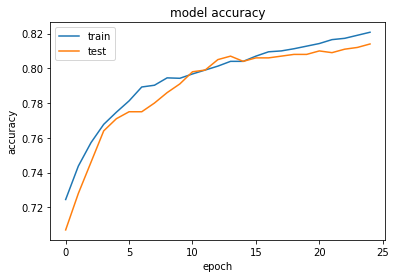

In [171]:
plt.plot(modelling.history['acc'])
plt.plot(modelling.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

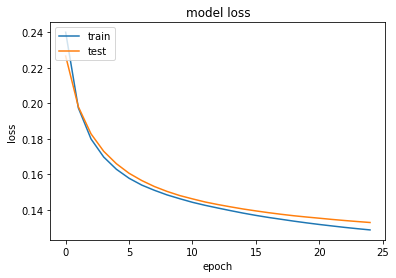

In [173]:
plt.plot(modelling.history['loss'])
plt.plot(modelling.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [177]:
loss, mse, accuracy = model.evaluate(X_test_img, y_test)


1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

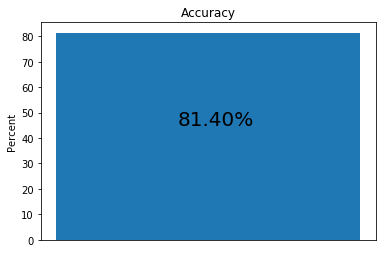

In [178]:
acc = accuracy * 100
plt.bar(1, acc)
plt.text(0.92,45,f'{acc:.2f}%', fontsize=20)
plt.title('Accuracy')
plt.xticks([])
plt.ylabel('Percent')
plt.show()

In [ ]:
#   Model(Best Parameters)                Train Score       Test Score    Train Score after PCA & Grid Search   Test score after PCA & Grid Search
# KNN(k=12)                                 0.8013            0.794              0.803                              0.782
# Log.Regression                            0.99625           0.987              0.969                              0.966             
# LinearSVC                                 0.95875           0.949              0.841                              0.827
# DecisionTree(min_splits = 2)               1                 1                 0.792                              0.785
# Best SVC Kernel                           0.996             0.989              0.951                              0.811 
# Neural networks                            NA               NA                 0.82                               0.81





# <font color = 'Green'> Yes PCA is better to avoid overfitting. The accuracy mostly decreases depending whether the no of features lost important or not 
